In [1]:
import sys

sys.path.append('..')

In [2]:
from datasets.fran_dataset import FRANDataset
from torchvision.transforms import transforms as tfm, functional as F

ds_train_no_tfm = FRANDataset(
    data_root='../data/FRAN_dataset/',
    is_val=False,
    transform=tfm.Compose([
        tfm.Resize(
            size=512
        ),
    ]),
)
ds_train_tfm = FRANDataset(
    data_root='../data/FRAN_dataset/',
    is_val=False,
    transform=tfm.Compose([
        tfm.RandomRotation(
            degrees=20
        ),
        tfm.RandomCrop(
            size=512
        ),
        tfm.ColorJitter(
            brightness=0.3,
            hue=0.05,
            saturation=0.3,
            contrast=0.3,
        ),
    ]),
)

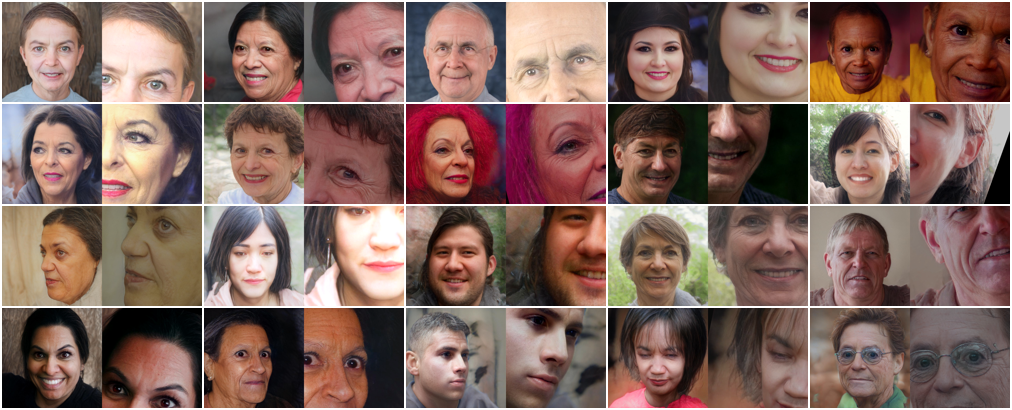

In [3]:
from random import randint
from PIL import Image
import numpy as np
from torchvision.utils import make_grid
import torch

img_arrs = []

for _ in range(20):
    idx = randint(0, len(ds_train_no_tfm))
    (im1, _, _, _) = ds_train_no_tfm[idx]
    (im2, _, _, _) = ds_train_tfm[idx]
    img_arrs.append(F.to_tensor(Image.fromarray(np.concatenate([im1, im2], axis=1)).resize((200, 100))))

imgs = torch.stack(img_arrs)
F.to_pil_image(make_grid(imgs, nrow=5, pad_value=1.0))